## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata_path, study_results_path, how='outer', on='Mouse ID')


# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
mouse = data_df["Mouse ID"].count()

mouse

1893

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse = data_df["Mouse ID"].value_counts()

mouse2 = data_df.drop_duplicates(subset="Mouse ID") 

mouse2["Mouse ID"].value_counts()
# what homework assignment should I refer to
# drop_duplicates .unique

n763    1
r811    1
g570    1
o848    1
a577    1
       ..
g791    1
c766    1
x336    1
v295    1
c139    1
Name: Mouse ID, Length: 249, dtype: int64

In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse2 = data_df.drop_duplicates(subset="Mouse ID") 

mouse2["Mouse ID"].value_counts()

mouse2_df = pd.DataFrame({"Mouse ID":[mouse]})

data_df
 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.

mouse = data_df["Mouse ID"].count()

mouse_df = data_df.groupby('Mouse ID')

summary_df = pd.DataFrame({"Mouse ID":[mouse]})

summary_df

,Mouse ID
0,1893


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_df = data_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_standev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.

summary_grouped_df = pd.DataFrame({'mean': tumor_mean, 'median': tumor_median, 'standard deviation': tumor_standev, 'sem': tumor_sem})


summary_grouped_df

,mean,median,standard deviation,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# .sum describe function
summary2_df = summary_df.describe()

summary2_df

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

Text(0.5, 1.0, 'Regimen Treatments')

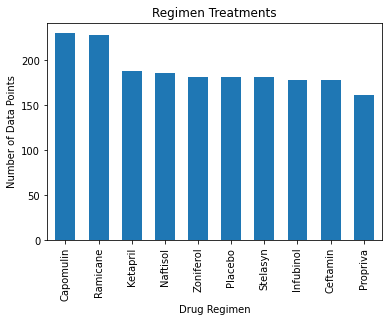

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.6, zorder=3)

# Setting the labels for the axis
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Regimen Treatments")


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

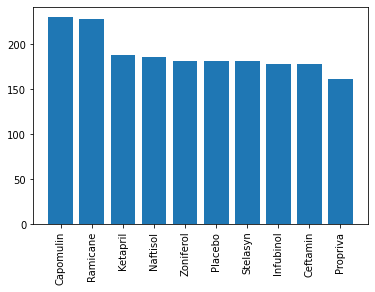

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Counting of the data points
counts = data_df['Drug Regimen'].value_counts()

# setting the x-axis to the lenght of the count
x_axis = np.arange(len(counts))

# value of the x-axis
plt.bar(x_axis, counts, width = .8, zorder=3)

# lable columns
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

plt.bar

#research on google column names

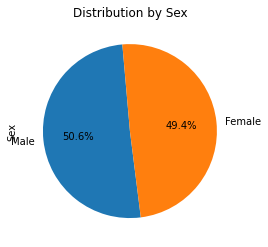

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#sex data
data = data_df['Sex'].value_counts()

#pie chart
pie_plot = data.plot.pie(autopct="%2.1f%%", startangle=95, title='Distribution by Sex')



#print(data)
#print(pie_plot)
plt.show()

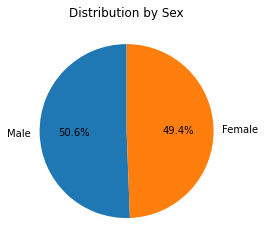

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# sex data
data = data_df['Sex'].value_counts()

# pie chart fill with color and precentages
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)

plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
data_groupby = data_df.groupby("Mouse ID")
data_groupdf = data_groupby['Timepoint'].max().reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timep
data_mergedf = pd.merge(data_groupdf, data_df, on=['Timepoint', 'Mouse ID'])

 
    
print(data_mergedf)   

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [44]:
# Put treatments into a list for for loop (and later for plot labels)

drugregimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugregimen:
    drug_values.append(data_df[data_df["Drug Regimen"] == drug]['Tumor Volume (mm3)'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
outliners_count = (values.loc[(data_df['Tumor Volume (mm3)'] >=upper_bound) | (data_df['Tumor Volume (mm3)'] <=lower_bound)].count())

NameError: name 'values' is not defined

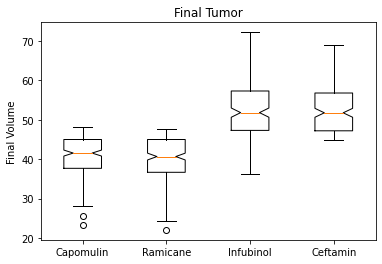

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor = dict(maker='o', markersize=8, markeredgecolor='black')

plt.boxplot(drug_values, final_tumor)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title('Final Tumor')
plt.ylabel('Final Volume')

plt.show()

## Line and Scatter Plots

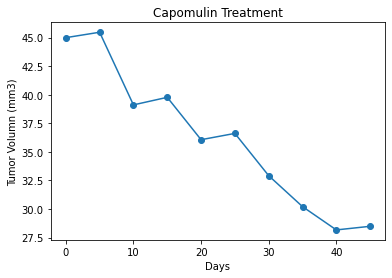

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# identify mouses that had treatment
mouse = data_df[data_df['Mouse ID'] == 'x401']

#line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

#titles
plt.xlabel('Days')
plt.ylabel('Tumor Volumn (mm3)')
plt.title('Capomulin Treatment')
plt.show()

In [67]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#I have not idea what I'm doing.......
#only find Capomulin Drugs
Capomulin_df = data_df[data_df['Drug Regimen'] == 'Capomulin']


plt.show()

print(Capomulin_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Capomulin_df = data_df[data_df['Drug Regimen'] == 'Capomulin']
volume_avg_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
volume_avg_df = pd.merge(Capomulin_df, volume_avg_df, on='Mouse ID')

#mouse weight
final_weight_df = volume_avg_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
volume_avg_df

#x and y axis
x = final_weight_df['Weight (g)']
y = final_weight_df['avg_tumor_vol']


volume_avg_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,avg_tumor_vol
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970
